# Determining gender based on image analysis

## Importing essential libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import keras
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split

## Loading a datasets

### Attribute labels for each image

In [ ]:
attributes = pd.read_csv(r'/content/list_attr_celeba.csv', index_col= 'image_id')

### Recommended partitioning of images into learning sets, validating, testing

In [ ]:
lvts = pd.read_csv(r'/content/list_eval_partition.csv', index_col='image_id')

### Loading images and labels divided into training, validation and test sets

In [ ]:
path = r'/content/img_align_celeba/img_align_celeba'
IMG_SIZE = 64

X_train = []
X_test = []
X_val = []
y_train = []
y_test = []
y_val = []


for i in os.listdir(path):
    
    image = cv2.imread(path + '/' + i)
    image = image.astype('uint8')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image.reshape(IMG_SIZE**2)

    if int(lvts.loc[i]) == 0:
        X_train.append(image)
        
        if int(attributes.loc[i]['Male']) == 1:
            y_train.append(int(attributes.loc[i]['Male']))
        else:
            y_train.append(0)
        
    if int(lvts.loc[i]) == 1:
        X_val.append(image)
          
        if int(attributes.loc[i]['Male']) == 1:
            y_val.append(int(attributes.loc[i]['Male']))
        else:
            y_val.append(0)
       
    if int(lvts.loc[i]) == 2:
        X_test.append(image)
            
        if int(attributes.loc[i]['Male']) == 1:
            y_test.append(int(attributes.loc[i]['Male']))
        else:
            y_test.append(0)

## Image Overview

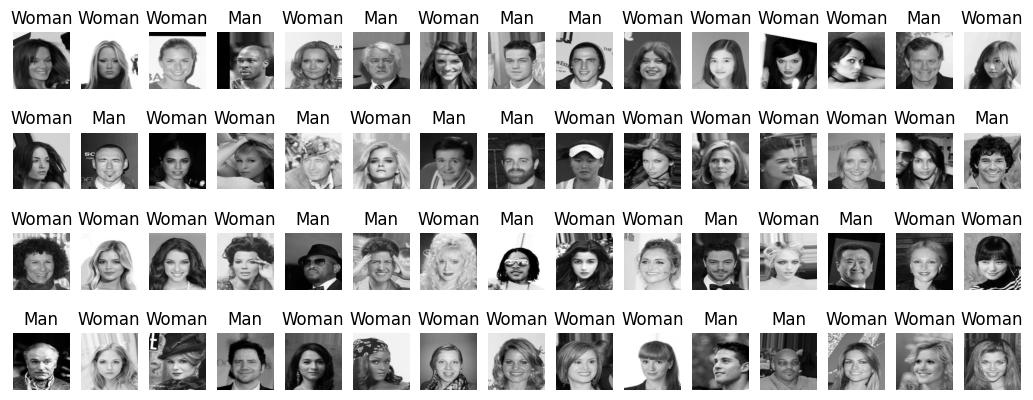

## Data distribution

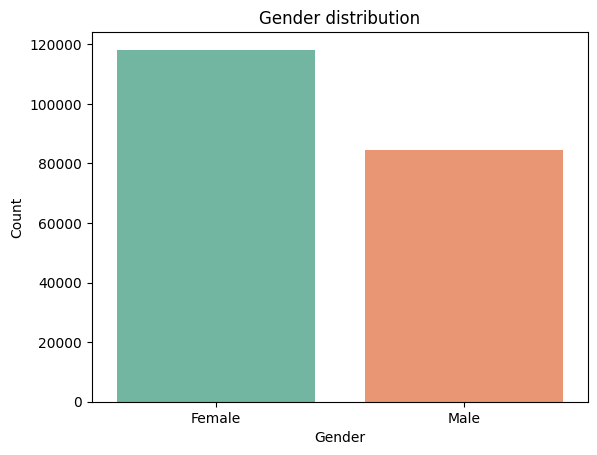

## Data preparation

### X

In [ ]:
X_train= np.array(X_train)
X_test= np.array(X_test)
X_val= np.array(X_val)

X_train= X_train.reshape((len(X_train), IMG_SIZE, IMG_SIZE))
X_test= X_test.reshape((len(X_test), IMG_SIZE, IMG_SIZE))
X_val= X_val.reshape((len(X_val), IMG_SIZE, IMG_SIZE))

X_train= X_train/ 255
X_test= X_test/ 255
X_val= X_val/ 255

### y

In [ ]:
y_train= np.array(y_train)
y_test= np.array(y_test)
y_val= np.array(y_val)

y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))
y_val = y_val.reshape((-1,1))

## Model

In [ ]:
model = Sequential()

# block 1
model.add(Conv2D(
    filters= 16,
    kernel_size= (3, 3),
    activation= 'relu',
    kernel_initializer='he_uniform',
    input_shape= (64,64,1)
))
model.add(BatchNormalization())

# block 2
model.add(Conv2D(16, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D ((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation= 'relu', kernel_initializer= 'he_uniform' ))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation= 'sigmoid'))

# compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# fit model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=2048,
    validation_data=(X_val, y_val),
    verbose=1
)

## Traning history

### Loss

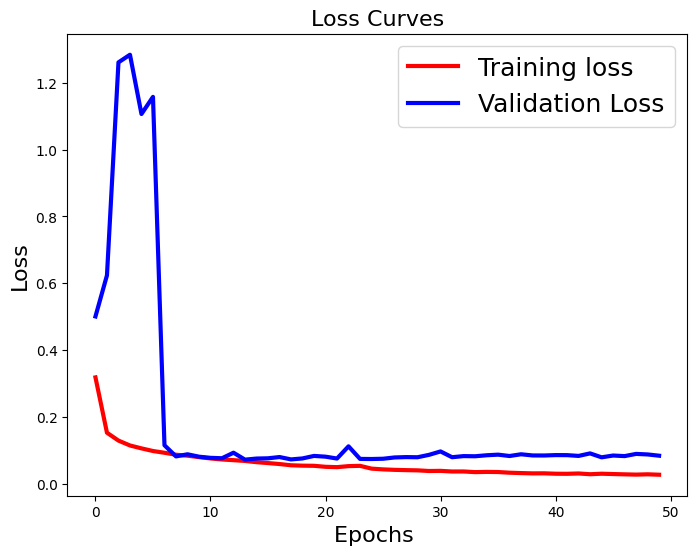

### Accuracy

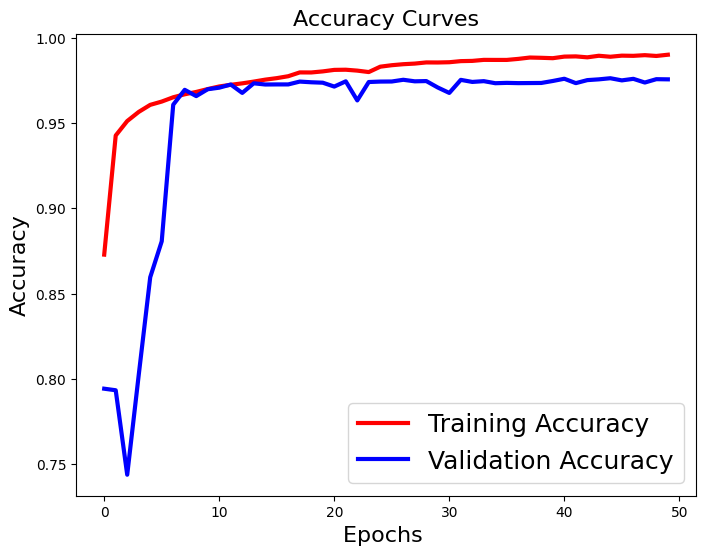

## Results

Test loss: 0.11497919261455536

Test accuracy: 0.9671375751495361



               precision    recall  f1-score   support

      Female       0.97      0.97      0.97     12247
        Male       0.96      0.96      0.96      7715

    accuracy                           0.97     19962
    macro avg      0.97      0.96      0.97     19962
    weighted avg   0.97      0.97      0.97     19962